In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import pandas_profiling as pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
#if we have any null values in the dataset
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


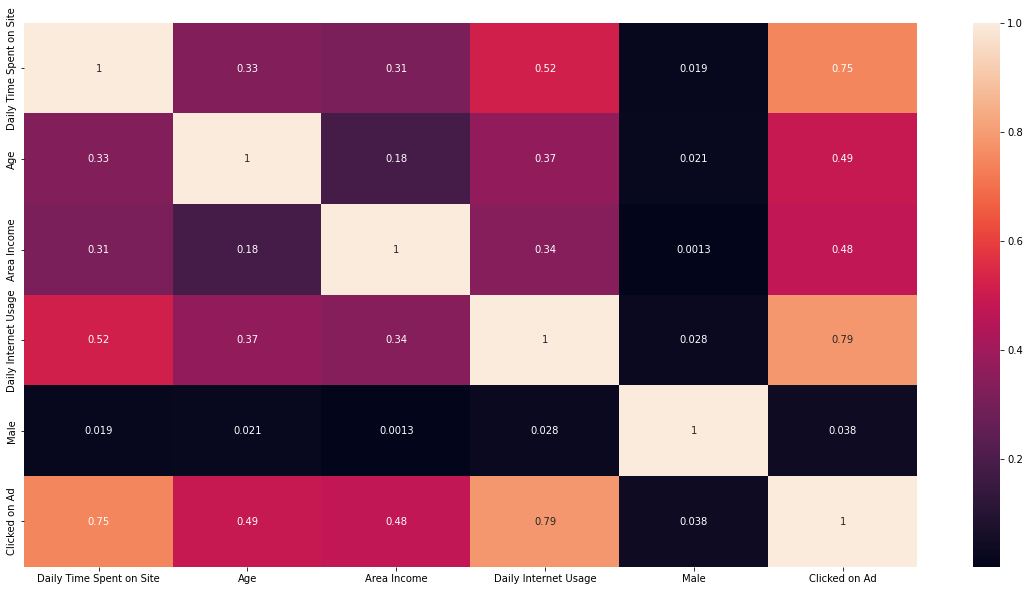

In [ ]:
#import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(),annot=True)

Observation:

•The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. 
 You can observe that the correlation between Daily Internet Usage and Clicked on Ad is highest (i.e. 0.79) followed by Daily Time Spend on Site and Clicked on Ad(i.e. 0.75) and then between Area Income and Male is lowest i.e. 0.0013.
 
•Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation.
 Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model building.


In [ ]:
# prints a correlation matrix for analyzing the highest correlation.
cormat = data.corr()
round(cormat,2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.00,-0.33,0.31,0.52,-0.02,-0.75
Age,-0.33,1.00,-0.18,-0.37,-0.02,0.49
Area Income,0.31,-0.18,1.00,0.34,0.00,-0.48
Daily Internet Usage,0.52,-0.37,0.34,1.00,0.03,-0.79
Male,-0.02,-0.02,0.00,0.03,1.00,-0.04
Clicked on Ad,-0.75,0.49,-0.48,-0.79,-0.04,1.00


In [ ]:
#The names of all the columns in the dataset

data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
# we are dropping the unnecessary columns 

x = data.iloc[:,0:7]
x= x.drop(['Ad Topic Line','City'],axis=1)
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [ ]:
y = data.iloc[:,9]
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

Now I will split the data into training and test sets. Here I will use 70 per cent of data as training and 30 per cent as testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 5)
(700,)
(300, 5)
(300,)


**Logistic** **Regression** **Model**

Now I will use the logistic regression model to predict the click-through rate of the users

In [23]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
Lr=LogisticRegression(C=0.01,random_state=0)
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)
print(y_pred)

[0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 0]


In [24]:
y_pred_train = Lr.predict(x_train) 

In [33]:
y_pred_test = Lr.predict(x_test)

In [35]:
y_pred_proba=Lr.predict_proba(x_test)
print(y_pred_proba)

[[9.59792501e-01 4.02074986e-02]
 [9.09776229e-01 9.02237714e-02]
 [7.01565507e-01 2.98434493e-01]
 [3.22512399e-01 6.77487601e-01]
 [2.61683053e-02 9.73831695e-01]
 [7.93135584e-01 2.06864416e-01]
 [9.81079720e-01 1.89202796e-02]
 [1.51174357e-02 9.84882564e-01]
 [8.13527820e-01 1.86472180e-01]
 [4.66011549e-03 9.95339885e-01]
 [4.49152136e-01 5.50847864e-01]
 [5.79962255e-01 4.20037745e-01]
 [9.71411345e-01 2.85886551e-02]
 [6.80813498e-01 3.19186502e-01]
 [1.57934217e-03 9.98420658e-01]
 [4.27634403e-03 9.95723656e-01]
 [9.78083451e-01 2.19165489e-02]
 [3.14819973e-03 9.96851800e-01]
 [9.84776758e-01 1.52232419e-02]
 [7.54927542e-03 9.92450725e-01]
 [4.39604876e-02 9.56039512e-01]
 [8.83260862e-01 1.16739138e-01]
 [3.43304798e-01 6.56695202e-01]
 [4.64330398e-01 5.35669602e-01]
 [1.04935760e-01 8.95064240e-01]
 [9.40619354e-01 5.93806460e-02]
 [9.64504455e-01 3.54955446e-02]
 [3.88141195e-02 9.61185880e-01]
 [7.55872151e-01 2.44127849e-01]
 [9.85954424e-01 1.40455764e-02]
 [9.635106

In [26]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [27]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.09
MAE for test set is 0.12666666666666668


In [28]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [29]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.3
RMSE for test set is 0.3559026084010437


In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8733333333333333


So we have an accuracy of around 87 per cent which is not bad for this kind of problem. At last, let’s have a look at the f1 score